#Lista 12

## Exercício 22

Erro Quadrático Médio (MSE): 0.000000
Coeficientes do filtro FIR (taps):
[-0.00147957  0.00196122  0.00252175 -0.0031697  -0.00391484  0.00476859
  0.00574458 -0.00685949 -0.00813413  0.00959513  0.0112774  -0.01322788
 -0.01551144  0.01822048  0.02149142 -0.02553416 -0.03068898  0.03754528
  0.04721871 -0.06210339 -0.0884292   0.14904834  0.44965988  0.44965988
  0.14904834 -0.0884292  -0.06210339  0.04721871  0.03754528 -0.03068898
 -0.02553416  0.02149142  0.01822048 -0.01551144 -0.01322788  0.0112774
  0.00959513 -0.00813413 -0.00685949  0.00574458  0.00476859 -0.00391484
 -0.0031697   0.00252175  0.00196122 -0.00147957]

Pesos aprendidos pelo modelo:
[-0.00142896  0.00197586  0.00255982 -0.00318451 -0.00397065  0.00477552
  0.00574009 -0.00682181 -0.00811981  0.00956532  0.01125509 -0.01324395
 -0.01552495  0.01827845  0.02146576 -0.02553235 -0.03068904  0.03749447
  0.04728277 -0.06209703 -0.0884263   0.14904888  0.44958634  0.44966898
  0.14902168 -0.0884133  -0.06208696  0.0471

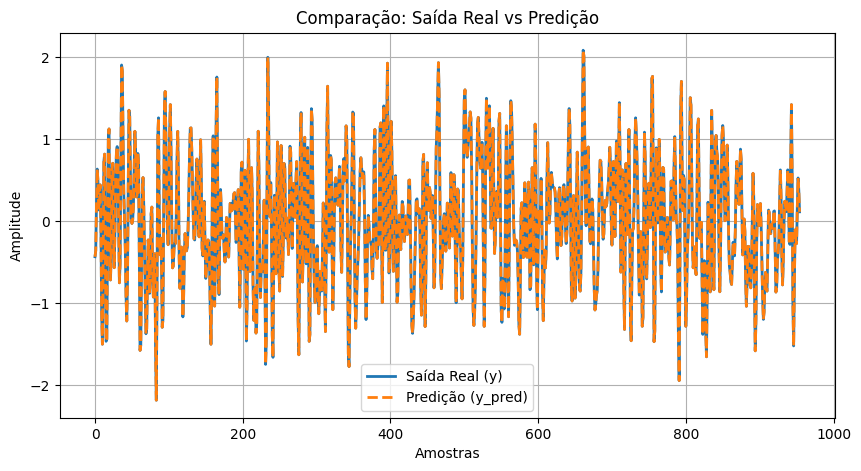

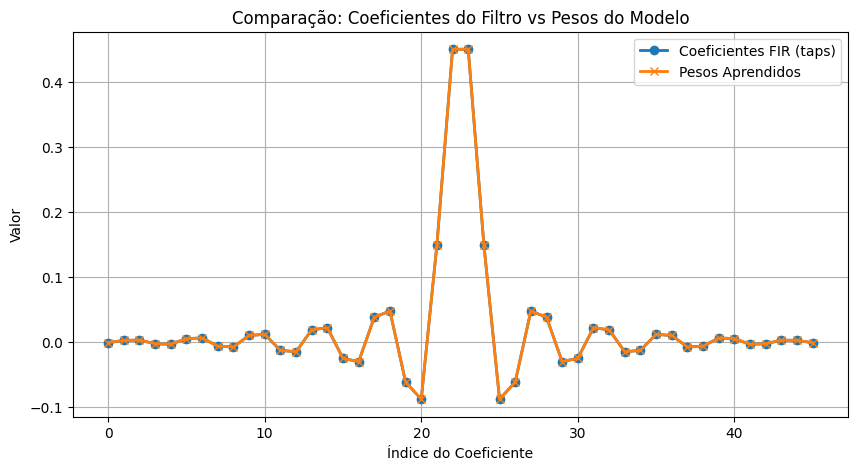

In [3]:
import numpy as np
from scipy.signal import kaiserord, lfilter, firwin
from sklearn.neural_network import MLPRegressor
import matplotlib.pyplot as plt

def createDataset(x, M):
    N = len(x)
    X = np.zeros((N - M, M + 1))
    for i in range(N - M):
        X[i, :] = x[i:i + M + 1][::-1]
    return X

N = 1000
fs = 1000.0
fc = 250.0
width = 50.0 / (fs / 2)
ripple_db = 40.0

x = np.random.normal(0, 1, N)

order, beta = kaiserord(ripple_db, width)
taps = firwin(order, fc / (fs / 2), window=('kaiser', beta))

y = lfilter(taps, 1.0, x)

M = len(taps) - 1
X = createDataset(x, M)
y = y[M:]


model = MLPRegressor(
    hidden_layer_sizes=(),
    activation='identity',
    solver='lbfgs',
    max_iter=10000
)
model.fit(X, y)

y_pred = model.predict(X)
mse = np.mean((y - y_pred) ** 2)
print(f"Erro Quadrático Médio (MSE): {mse:.6f}")

print("Coeficientes do filtro FIR (taps):")
print(taps)
print("\nPesos aprendidos pelo modelo:")
print(model.coefs_[0].flatten())

plt.figure(figsize=(10, 5))
plt.plot(y, label='Saída Real (y)', linewidth=2)
plt.plot(y_pred, label='Predição (y_pred)', linestyle='--', linewidth=2)
plt.title("Comparação: Saída Real vs Predição")
plt.xlabel("Amostras")
plt.ylabel("Amplitude")
plt.legend()
plt.grid()
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(taps, label='Coeficientes FIR (taps)', marker='o', linewidth=2)
plt.plot(model.coefs_[0].flatten(), label='Pesos Aprendidos', marker='x', linewidth=2)
plt.title("Comparação: Coeficientes do Filtro vs Pesos do Modelo")
plt.xlabel("Índice do Coeficiente")
plt.ylabel("Valor")
plt.legend()
plt.grid()
plt.show()